In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

In [ ]:
# Note that the SOC is from 5%-80% for the Porche Taycan


# E_tb: Theoretical Energy Capacity (Wh)    94 kWh 
# E_b: Actual Energy Capacity (Wh)          83.7 kWh
# SP_b: Specific Power of Battery           

  # m_s: mass of the substance altered at an electrode (kg)
  # M_m: Molar mass of substance in (g/mol)
  # Q: Total electric charge passed through the substance
  #F_b: 96,485 C/mol is Faraday Constant
  #z_b: valency number of ions of the substance
  #m_s=(M_m/Z_b)*(Q/F_b)

#C_T,b: Theoretical capacity of the battery in coulombs
#C_T,b = (n_b*F_b*Z_b)*.278
#n_b: Amount of substance being altered. (in number of moles) is n_b = (m_s/M_m)

#C_u,b: useable capicty of the battery in coulombs
#C_u,b=Integral (t_o to t_cut) of C(t) dt: 
#t_cut is when battery terminal voltage is purposley cutoff ie at a specific DOD

#V_b: Internal Voltage
#R_bi: Internal Resistance
#V_bt: Voltage measured at the battery terminals


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



#Battery Layout: LG Chem Batterys, 396 cells, into 33 modules of 12 cells each, 396 cells divided into two sets connected in pararell. In each set there are 198 cells connect in series
#Porche HOld back 10kW of power for DOD which is why they use 83.7kW, this extends life of the pack
# Max charging power is 270kW
# Each cell is 3.1V when depleted but 4.2V when fully charge
#Each Cell is rated at 64.5Ah

FWFET= np.loadtxt('FWFET.txt', dtype=float)


Batterys_total = 396 #Total number of individual cells
Batterys_series = 198
Packs_parallel = 2 #Number of packs in parallel
Max_V = 4.2 #V
Min_V = 3.0 #V
Avg_V = 3.7 #V
Max_Charge_Power = 270*1000 #W
Battery_Charge = 64.5 #Ah


G_Energy_Capacity = Avg_V * Battery_Charge * Batterys_total
N_Energy_Capacity = G_Energy_Capacity*0.885
V_b_max = Batterys_series * Max_V
V_b_min = Batterys_series * Min_V
Max_charge_current = Max_Charge_Power/V_b_max
G_Coulometric_Capacity = G_Energy_Capacity/V_b_max
N_Coulometric_Capacity = N_Energy_Capacity/V_b_max
Max_SOC = 1.0
Min_SOC = 0.01

AVG_HWFET_SPEED = 69.2 #km/h
i = 18 #A

t_dis = (Max_SOC - Min_SOC) * (N_Coulometric_Capacity/i)
HWFET_distnace = t_dis * AVG_HWFET_SPEED


print("Max Battery Voltage =",V_b_max, "[V]")
print("Gross Battery Capacity =",G_Energy_Capacity/1000, "[kWh]")
print("Net Battery Capacity =",N_Energy_Capacity/1000, "[kWh]")
print("Net Coulometric Battery Capacity =",N_Coulometric_Capacity,"[Ah]")
print("Average Time to Discharge at 18 [A] =", t_dis, "[h]")
print("Average Highway distance =",HWFET_distnace, "[km]")

#Asher said drain it and plot
#driving at x speed what will range be. 
#Plot of miles driven vs capacity
#Assume constant voltage throughout

time_h = ((FWFET[:,0])/3600)*25
speed_kph = (FWFET[:,1])*25
current = (FWFET[:,2])*25
Ah = (FWFET[:,3])*25
Ah_cumulative = np.cumsum(Ah)
SOC = Ah_cumulative/1.05

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 20)

plot1 = plt.subplot(311)
plot2 = plt.subplot(312)
plot3 = plt.subplot(313)


plot1.plot(time_h, current)
plot1.set_xlabel("Time (h)")
plot1.set_ylabel("Current (A)")

plot2.plot(time_h, Ah_cumulative)
plot2.set_xlabel("Time (h)")
plot2.set_ylabel("Ah Used")

plot3.plot(time_h, SOC)
plot3.set_xlabel("Time (h)")
plot3.set_ylabel("SOC (%)")

plt.show()




OSError: ignored

In [ ]:
#Charge:
M_m = 6.94 #Molar mass of lithium (g/mol)
z_b = 1 # of valnce electrons
Q = 64.5 * 3600 #charge per cell in coulombs
F_b = 96485 # Faradays constant (C/mol)

m_s = (M_m/z_b) * (Q/F_b)
n_b = m_s / M_m
C_T_b = n_b * F_b * z_b
C_T_b_Ah = 0.278 * n_b * F_b * z_b

print(C_T_b_Ah," [Ah] per cell")



64551.600000000006  [Ah] per cell


Text(0, 0.5, 'Power (kW)')

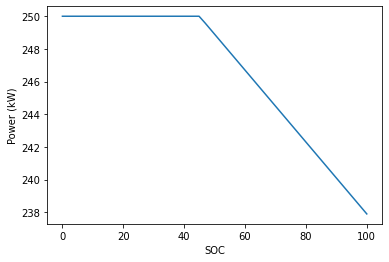

In [ ]:
#Modeling Charge Rate: https://insideevs.com/news/551235/porsche-taycan-amazing-fast-charging/
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


SOC1, SOC2, SOC3, = 0, 45, 100
P1, P2, P3 = 250, 250, 0

m1 = 0
m2 = (SOC3-SOC2)/(P3-P2)


def P(SOC):
    if SOC>=SOC1 and SOC<SOC2:
        return m1 * (SOC - SOC1) + P1
    if SOC>=SOC2:
        return m2 * (SOC - SOC2) + P2
Power = np.vectorize(P)




SOC = np.linspace(0, 100)
Power = Power(SOC)


fig = matplotlib.pyplot.gcf()
plot1 = plt.subplot(111)


plot1.plot(SOC, Power)
plot1.set_xlabel("SOC")
plot1.set_ylabel("Power (kW)")


# Charging profile step input
The power starts high then decreases over time to trickle down the close the battery gets full. 

In [ ]:
###   fast charge plots    ###

charge = pd.read_csv('/content/charge_profile.csv')
charge.columns = ['km/min', 'soc']

soc = charge['soc']
wltp = charge['km/min']
iev = 0.98*charge['km/min']
hwy = 0.71*charge['km/min']
combo = 0.70*charge['km/min']

pwr = 10.416*charge['km/min']

avg = (wltp + iev + hwy + combo)/4 
avg

NameError: ignored

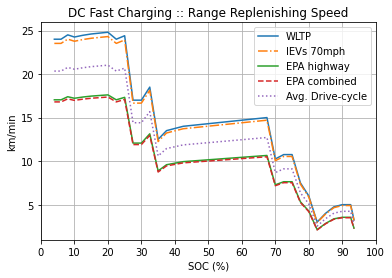

In [ ]:
plt.plot(soc, wltp, label = 'WLTP')
plt.plot(soc, iev, linestyle = '-.', label = 'IEVs 70mph')
plt.plot(soc, hwy, label = 'EPA highway')
plt.plot(soc, combo, linestyle = '--', label = 'EPA combined')
plt.plot(soc, avg, linestyle = ':', label = 'Avg. Drive-cycle')
plt.xlabel('SOC (%)')
plt.ylabel('km/min')
plt.title('DC Fast Charging :: Range Replenishing Speed')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, step=10))
plt.legend()
plt.grid()
plt.show()

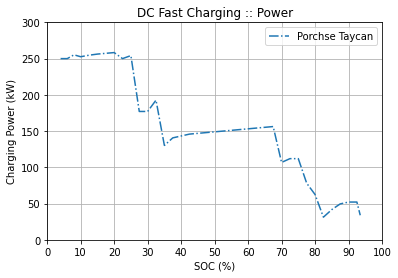

In [ ]:
plt.plot(soc, pwr, linestyle = '-.', label = 'Porchse Taycan')
plt.xlabel('SOC (%)')
plt.ylabel('Charging Power (kW)')
plt.title('DC Fast Charging :: Power')
plt.xlim(0, 100)
plt.ylim(0, 300)
plt.xticks(np.arange(0, 101, step=10))
plt.legend()
plt.grid()
plt.show()

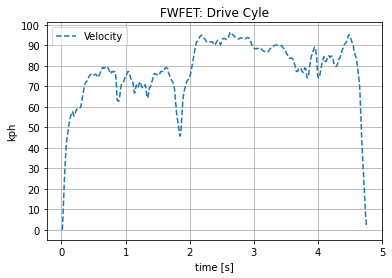

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fwfet = pd.read_csv('/content/FWFET.csv')
fwfet.columns = ['time', 'kph', 'amp', 'ah']

plt.plot(fwfet['time']/160, fwfet['kph'], linestyle = '--', label='Velocity')
plt.title('FWFET: Drive Cyle')
plt.xlabel('time [s]')
plt.ylabel('kph')
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()

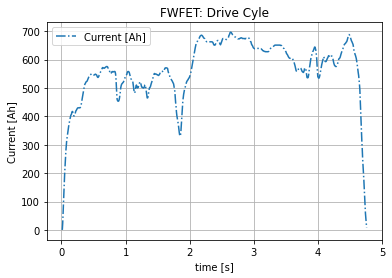

In [ ]:
plt.plot(fwfet['time']/160, fwfet['ah']*100000, linestyle = '-.',label='Current [Ah]')
plt.title('FWFET: Drive Cyle')
plt.xlabel('time [s]')
plt.ylabel('Current [Ah]')
plt.yticks(np.arange(0, 710, 100))
plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


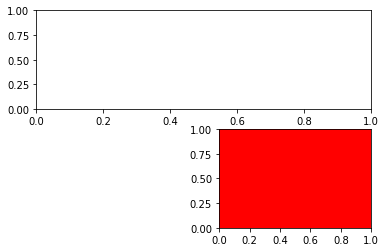

In [ ]:
fig, axs = plt.subplots(3, 1)
axs[0].set_title('velocity vs time')
axs[0].plot(fwfet['time']/160, fwfet['kph'])
axs[0].set_ylabel('[mph]')
axs[0].set_xlabel('[s]')
axs[0].grid(True)

axs[1].plot(, color='orange')
axs[1].set_xlabel('[s]')
axs[1].set_ylabel('[mph]')
axs[1].grid(True)

In [ ]:
# Fast Sim Demo

from fastsim import vehicle, cycle, simdrive
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



veh = vehicle.Vehicle(22) 
print(veh.Scenario_name)

cyc = cycle.Cycle("hwfet")
sim = simdrive.SimDriveClassic(cyc, veh) 
sim.sim_drive()

plt.plot(cyc.cycSecs, sim.soc*100, color = 'black')

plt.ylim(86, 90)
plt.xlim(0, 800)
plt.xticks(np.arange(0, 800.1, step=100))
plt.yticks(np.arange(86, 90.1, step=.5))
plt.xlabel("Time [s]")
plt.ylabel("SOC [%]")
plt.title('SOC [%] vs. Time [s]')
plt.show()

ModuleNotFoundError: ignored